In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist,fashion_mnist

In [4]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.reshape([-1,28,28,1])/255
x_test = x_test.reshape([-1,28,28,1])/255

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_test.shape

(10000, 28, 28, 1)

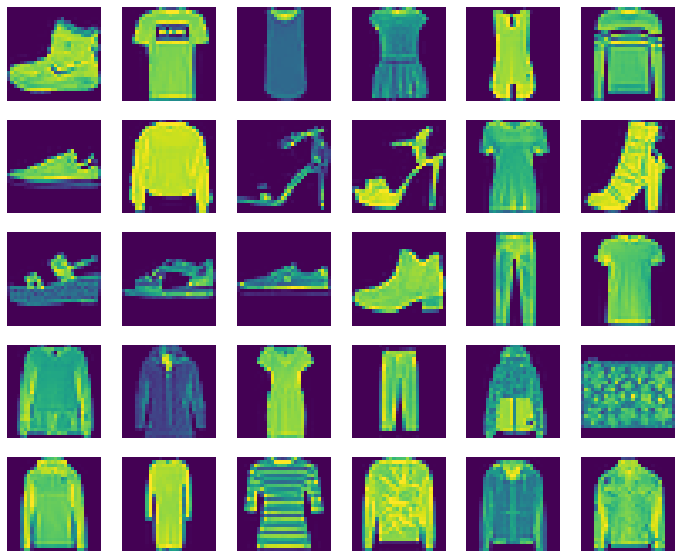

In [8]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure
subplot_size = 2
f = plt.figure(figsize=(subplot_size*cols, subplot_size*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(x_train[i].reshape([28,28])) 
    plt.axis("off")
plt.savefig("digits_original.png")

In [9]:
inputs = Input(shape=(28,28,1))
x = Conv2D(128, 3, activation='relu', padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
x = Conv2D(2, 3, activation='relu', padding='same')(x)
encoded = Conv2D(1, 3, activation='relu', padding='same')(x)

In [10]:
x = Conv2D(1, 3, activation='relu', padding='same')(encoded)
x = Conv2D(2, 3, activation='relu', padding='same')(x)
x = Conv2D(4, 3, activation='relu', padding='same')(encoded)
x = Conv2D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [11]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                             

In [12]:
epochs = 50
batch_size=256
history=autoencoder.fit(x_train,x_train,epochs=epochs,batch_size=batch_size,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 38s 113ms/step - loss: 0.3780 - val_loss: 0.3076
Epoch 2/50
235/235 [==============================] - 25s 108ms/step - loss: 0.3054 - val_loss: 0.2956
Epoch 3/50
235/235 [==============================] - 25s 108ms/step - loss: 0.2973 - val_loss: 0.2916
Epoch 4/50
235/235 [==============================] - 26s 110ms/step - loss: 0.2925 - val_loss: 0.2865
Epoch 5/50
235/235 [==============================] - 26s 110ms/step - loss: 0.2893 - val_loss: 0.2843
Epoch 6/50
235/235 [==============================] - 26s 110ms/step - loss: 0.2868 - val_loss: 0.2841
Epoch 7/50
235/235 [==============================] - 26s 110ms/step - loss: 0.2850 - val_loss: 0.2820
Epoch 8/50
235/235 [==============================] - 26s 110ms/step - loss: 0.2835 - val_loss: 0.2790
Epoch 9/50
235/235 [==============================] - 26s 110ms/step - loss: 0.2821 - val_loss: 0.2799
Epoch 10/50
235/235 [==============================] - 26s 110ms/step - l

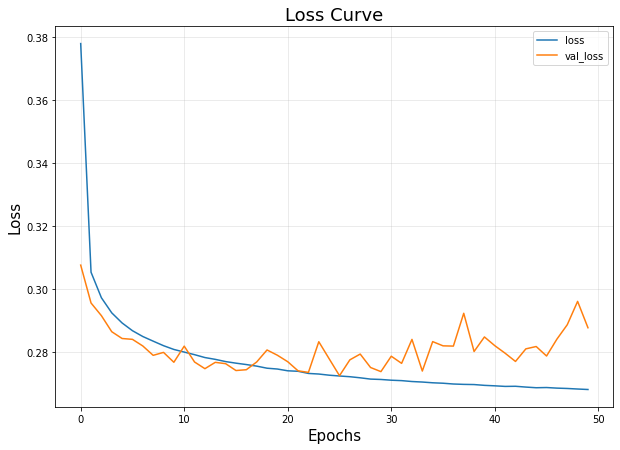

In [14]:

f = plt.figure(figsize=(10,7))
f.add_subplot()


plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

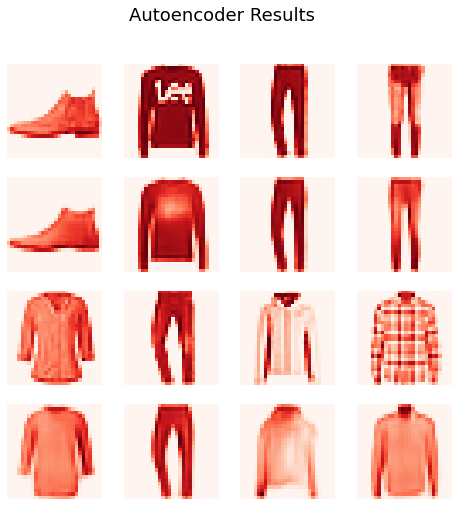

In [16]:
num_imgs = 8

test_result = autoencoder.predict(x_test)



# Visualize test images with their denoised images

rows = 2 # defining no. of rows in figure
cols = 4 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2)) # defining a figure 

for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(x_test[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(test_result[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
f.suptitle("Autoencoder Results",fontsize=18)
plt.savefig("test_results.png")
plt.show()